## Interactions

Explore the effect of interactions between explanatory variables. Considering interactions allows for more realistic models that can have better predictive power. You'll also deal with Simpson's Paradox: a non-intuitive result that arises when you have multiple explanatory variables.

### One model per category
The model you ran on the whole dataset fits some parts of the data better than others. It's worth taking a look at what happens when you run a linear model on different parts of the dataset separately, to see if each model agrees or disagrees with the others

In [7]:
# libraries
library(fst)
library(ggplot2)
library(dplyr)
library(broom)
library(moderndive)
# read and see data 
taiwan_real_estate = read_fst("taiwan_real_estate2.fst")

# # Filter for rows where house age is 0 to 15 years, 15-30 and 30-45 
taiwan_0_to_15 <- taiwan_real_estate %>%
  filter(house_age_years == "0 to 15")
taiwan_15_to_30 <- taiwan_real_estate %>%
  filter(house_age_years == "15 to 30")
taiwan_30_to_45 <- taiwan_real_estate %>%
  filter(house_age_years == "30 to 45")

# Model price vs. no. convenience stores all ages
mdl_all_ages <- lm(price_twd_msq ~ n_convenience, data = taiwan_real_estate)

# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 <- lm(price_twd_msq ~ n_convenience, data = taiwan_0_to_15)

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 <- lm(price_twd_msq ~ n_convenience, data = taiwan_15_to_30)

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 <- lm(price_twd_msq ~ n_convenience, data = taiwan_30_to_45)

# See the results
mdl_all_ages
mdl_0_to_15
mdl_15_to_30
mdl_30_to_45


Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Coefficients:
  (Intercept)  n_convenience  
       8.2242         0.7981  



Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_0_to_15)

Coefficients:
  (Intercept)  n_convenience  
       9.2417         0.8336  



Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_15_to_30)

Coefficients:
  (Intercept)  n_convenience  
       6.8719         0.8519  



Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_30_to_45)

Coefficients:
  (Intercept)  n_convenience  
       8.1131         0.6687  


 ### Predicting multiple models
In order to see what each of the models for individual categories are doing, it's helpful to make predictions from them. The flow is exactly the same as the flow for making predictions on the whole model, though remember that you only have a single explanatory variable in these models (so expand_grid() isn't needed.)

In [2]:
# Create a tibble of explanatory data, setting
# no. of conv stores to 0 to 10
explanatory_data <- tibble(n_convenience = seq(0,10,1))

# Add column of predictions using "0 to 15" model and explanatory data 
prediction_data_0_to_15 <- explanatory_data %>% 
  mutate(price_twd_msq = predict(mdl_0_to_15, explanatory_data))

# Same again, with "15 to 30"
prediction_data_15_to_30 <- explanatory_data %>% 
  mutate(price_twd_msq = predict(mdl_15_to_30, explanatory_data))


# Same again, with "30 to 45"
prediction_data_30_to_45 <- explanatory_data %>% 
  mutate(price_twd_msq = predict(mdl_30_to_45, explanatory_data))


### Visualizing multiple models
In the last two exercises, you ran models for each category of house ages separately, then calculated predictions for each model. Now it's time to visualize those predictions to see how they compare.

When you use geom_smooth() in a ggplot with an aesthetic that splits the dataset into groups and draws a line for each group (like the color aesthetic), you get multiple trend lines. This is the same as running a model on each group separately, so we get a chance to test our predictions against ggplot's.

`geom_smooth()` using formula 'y ~ x'


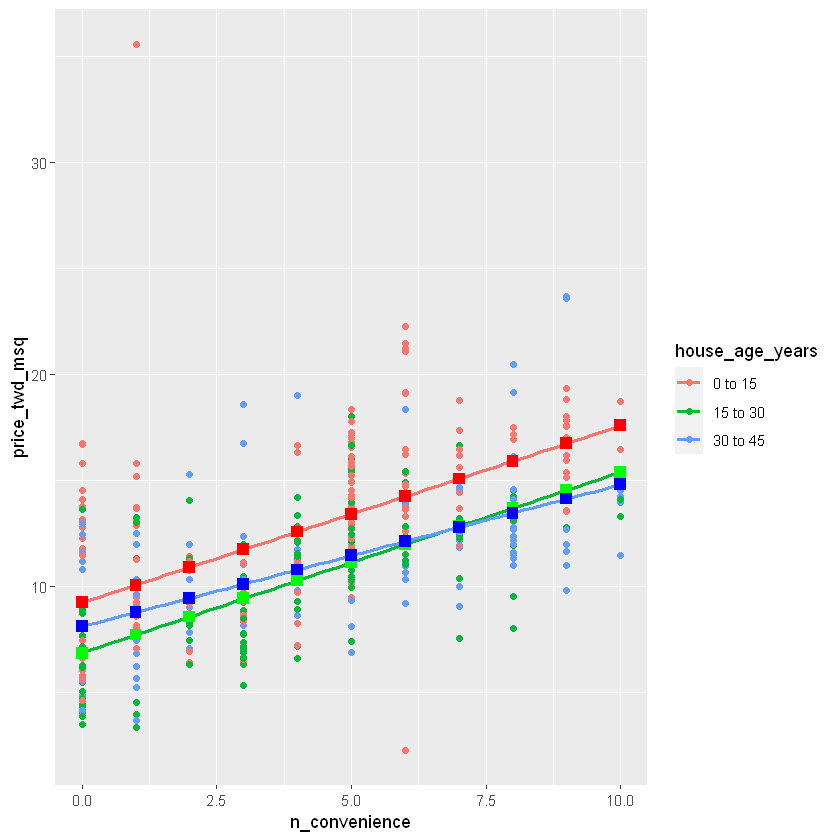

In [5]:
# Using taiwan_real_estate, plot price vs. no. of conv. stores
# colored by house age
taiwan_real_estate %>% 
  ggplot(aes(n_convenience, price_twd_msq, color = house_age_years)) +
  # Make it a scatter plot
  geom_point() +
  # Add smooth linear regression trend lines, no ribbon
  geom_smooth(method = "lm", se = FALSE) +
  # Add points using prediction_data_0_to_15, colored red, size 3, shape 15
    geom_point(data = prediction_data_0_to_15, color = "red", size = 3, shape = 15 ) +
  # Add points using prediction_data_15_to_30, colored green, size 3, shape 15
  geom_point(data = prediction_data_15_to_30, color = "green", size = 3, shape = 15 ) +
  # Add points using prediction_data_30_to_45, colored blue, size 3, shape 15
  geom_point(data = prediction_data_30_to_45, color = "blue", size = 3, shape = 15 )

### Assessing model performance
To test which approach is best – the whole dataset model or the models for each house age category – you need to calculate some metrics. Here's, you'll compare the coefficient of determination and the residual standard error for each model.

In [8]:
# Get the coeff. of determination for mdl_all_ages
mdl_all_ages %>%
glance() %>%
pull(r.squared)


# Get the coeff. of determination for mdl_0_to_15
mdl_0_to_15 %>%
glance() %>%
pull(r.squared)



# Get the coeff. of determination for mdl_15_to_30
mdl_15_to_30 %>%
glance()%>%
pull(r.squared)



# Get the coeff. of determination for mdl_30_to_45
mdl_30_to_45 %>%
glance() %>%
pull(r.squared)

[1] 0.3260466

[1] 0.3120536

[1] 0.4424605

[1] 0.3125713

In [9]:
# Get the RSE for mdl_all
mdl_all_ages %>%
glance() %>%
pull(sigma)

# Get the RSE for mdl_0_to_15
mdl_0_to_15 %>%
glance() %>%
pull(sigma)

# Get the RSE for mdl_15_to_30
mdl_15_to_30 %>%
glance() %>%
pull(sigma)

# Get the RSE for mdl_30_to_45
mdl_30_to_45 %>%
glance() %>%
pull(sigma)


[1] 3.383888

[1] 3.564127

[1] 2.585273

[1] 3.239037

### Specifying an interaction
So far you used a single parallel slopes model, which gave an OK fit for the whole dataset, then three separate models for each house age category, which gave a better fit for each individual category, but was clunky because you had three separate models to work with and explain. Ideally, you'd have a single model that had all the predictive power of the individual models.

Defining this single model is achieved through adding interactions between explanatory variables. R's formula syntax is flexible, and gives you a couple of options, depending on whether you prefer concise code that is quick to type and to read, or explicit code that describes what you are doing in detail.

In [10]:
# Model price vs both with an interaction using "times" syntax
lm(price_twd_msq ~ n_convenience * house_age_years, data = taiwan_real_estate)


Call:
lm(formula = price_twd_msq ~ n_convenience * house_age_years, 
    data = taiwan_real_estate)

Coefficients:
                          (Intercept)                          n_convenience  
                              9.24170                                0.83359  
              house_age_years15 to 30                house_age_years30 to 45  
                             -2.36978                               -1.12858  
n_convenience:house_age_years15 to 30  n_convenience:house_age_years30 to 45  
                              0.01833                               -0.16489  


In [11]:
# Model price vs both with an interaction using "colon" syntax
lm(price_twd_msq ~ n_convenience + house_age_years + n_convenience:house_age_years , data = taiwan_real_estate)


Call:
lm(formula = price_twd_msq ~ n_convenience + house_age_years + 
    n_convenience:house_age_years, data = taiwan_real_estate)

Coefficients:
                          (Intercept)                          n_convenience  
                              9.24170                                0.83359  
              house_age_years15 to 30                house_age_years30 to 45  
                             -2.36978                               -1.12858  
n_convenience:house_age_years15 to 30  n_convenience:house_age_years30 to 45  
                              0.01833                               -0.16489  


### Interactions with understandable coeffs
The previous model with the interaction term returned coefficients that were a little tricky to interpret. In order clarify what the model is predicting, you can reformulate the model in a way that returns understandable coefficients. For further clarity, you can compare the results to the models on the separate house age categories (mdl_0_to_15, mdl_15_to_30, and mdl_30_to_45).

In [13]:
# Model price vs. house age plus an interaction, no intercept
mdl_readable_inter <- lm(price_twd_msq ~ house_age_years + n_convenience:house_age_years + 0 , data = taiwan_real_estate)

# See the result
mdl_readable_inter

# Get coefficients for mdl_0_to_15
coefficients(mdl_0_to_15)

# Get coefficients for mdl_15_to_30
coefficients(mdl_15_to_30)

# Get coefficients for mdl_30_to_45
coefficients(mdl_30_to_45)


Call:
lm(formula = price_twd_msq ~ house_age_years + n_convenience:house_age_years + 
    0, data = taiwan_real_estate)

Coefficients:
               house_age_years0 to 15                house_age_years15 to 30  
                               9.2417                                 6.8719  
              house_age_years30 to 45   house_age_years0 to 15:n_convenience  
                               8.1131                                 0.8336  
house_age_years15 to 30:n_convenience  house_age_years30 to 45:n_convenience  
                               0.8519                                 0.6687  


(Intercept) n_convenience 
    9.2417022     0.8335867

(Intercept) n_convenience 
    6.8719186     0.8519172

(Intercept) n_convenience 
    8.1131235     0.6686981

### Predicting with interactions
As with every other regression model you've created, the fun part is making predictions. Fortunately, the code flow for this case is the same as the one without interactions – R can handle calculating the interactions without any extra prompting from you. The only thing you need to remember is the trick for getting combinations of explanatory variables.

In [16]:
# Make a grid of explanatory data
explanatory_data <- expand_grid(
  # Set n_convenience to zero to ten
  n_convenience = seq(0,10,1),
  # Set house_age_years to the unique values of that variable
  house_age_years = unique(taiwan_real_estate$house_age_years)
)


# See the result
explanatory_data

# Add predictions to the data frame
prediction_data <- explanatory_data %>% 
  mutate(price_twd_msq = predict(mdl_readable_inter, explanatory_data))

# See the result
prediction_data


n_convenience,house_age_years
0,30 to 45
1,30 to 45
2,30 to 45
3,30 to 45
4,30 to 45
5,30 to 45
6,30 to 45
7,30 to 45
8,30 to 45
9,30 to 45


n_convenience,house_age_years,price_twd_msq
0,30 to 45,8.113123
1,30 to 45,8.781822
2,30 to 45,9.450520
3,30 to 45,10.119218
4,30 to 45,10.787916
5,30 to 45,11.456614
6,30 to 45,12.125312
7,30 to 45,12.794010
8,30 to 45,13.462709
9,30 to 45,14.131407


`geom_smooth()` using formula 'y ~ x'


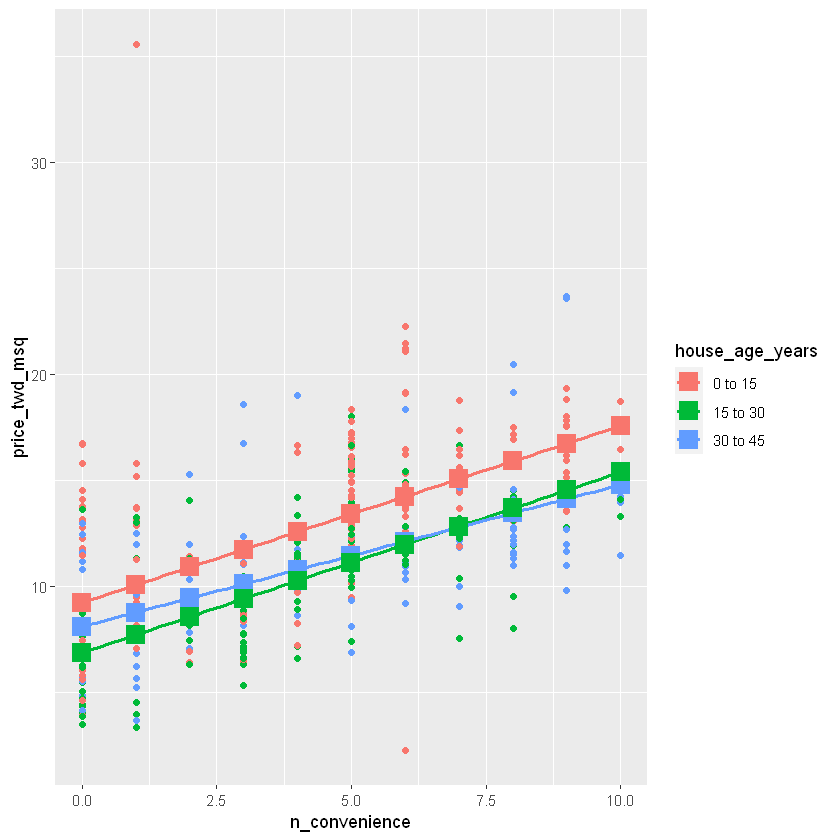

In [17]:
# plot 
taiwan_real_estate %>% 
  ggplot(aes(n_convenience, price_twd_msq, color = house_age_years)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  geom_point(data =  prediction_data, size = 5, shape = 15)

### Manually calculating predictions with interactions
In order to understand how predict() works, it's time to calculate the predictions manually again. For this model, there are three separate lines to calculate for, and in each one, the prediction is an intercept plus a slope times the numeric explanatory value. The tricky part is getting the right intercept and the right slope for each case.

In [19]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs <- coefficients(mdl_readable_inter)

# Get the intercept for 0 to 15 year age group
intercept_0_15 <- coeffs[1]

# Get the intercept for 15 to 30 year age group
intercept_15_30 <- coeffs[2]

# Get the intercept for 30 to 45 year age group
intercept_30_45 <- coeffs[3]

# Get the slope for 0 to 15 year age group
slope_0_15 <- coeffs[4]

# Get the slope for 15 to 30 year age group
slope_15_30 <- coeffs[5]

# Get the slope for 30 to 45 year age group
slope_30_45 <- coeffs[6]

prediction_data <- explanatory_data %>% 
  mutate(
    # Consider the 3 cases to choose the price
    price_twd_msq = case_when(
      house_age_years == "0 to 15" ~ intercept_0_15 + slope_0_15 * n_convenience,
      house_age_years == "15 to 30" ~ intercept_15_30 + slope_15_30 * n_convenience,
      house_age_years == "30 to 45" ~ intercept_30_45 + slope_30_45 * n_convenience 
    ) 
  )

# See the result
prediction_data

n_convenience,house_age_years,price_twd_msq
0,30 to 45,8.113123
1,30 to 45,8.781822
2,30 to 45,9.450520
3,30 to 45,10.119218
4,30 to 45,10.787916
5,30 to 45,11.456614
6,30 to 45,12.125312
7,30 to 45,12.794010
8,30 to 45,13.462709
9,30 to 45,14.131407


### Modeling eBay auctions
Sometimes modeling a whole dataset suggests trends that disagree with models on separate parts of that dataset. This is known as Simpson's paradox. In the most extreme case, you may see a positive slope on the whole dataset, and negative slopes on every subset of that dataset (or the other way around).Over the next few exercises, you'll look at eBay auctions (https://www.modelingonlineauctions.com/datasets). 

'data.frame':	1861 obs. of  8 variables:
 $ auctionid   : num  8.21e+09 8.21e+09 8.21e+09 8.21e+09 8.21e+09 ...
 $ bid         : num  53 51 102 57 144 ...
 $ bidtime     : num  1.2 1.2 1.2 1.71 3.09 ...
 $ bidder      : Factor w/ 657 levels "","1gyros","2005jevonne",..: 260 646 646 445 414 235 63 414 355 29 ...
 $ bidderrate  : int  94 90 90 14 3 5 1 3 12 292 ...
 $ openbid     : num  50 50 50 50 50 ...
 $ price       : num  312 312 312 312 312 ...
 $ auction_type: Factor w/ 8 levels "1 day","2 day",..: 2 2 2 3 4 5 6 7 7 8 ...



Call:
lm(formula = price ~ openbid, data = auctions)

Coefficients:
(Intercept)      openbid  
   153.0035      -0.1761  


`geom_smooth()` using formula 'y ~ x'


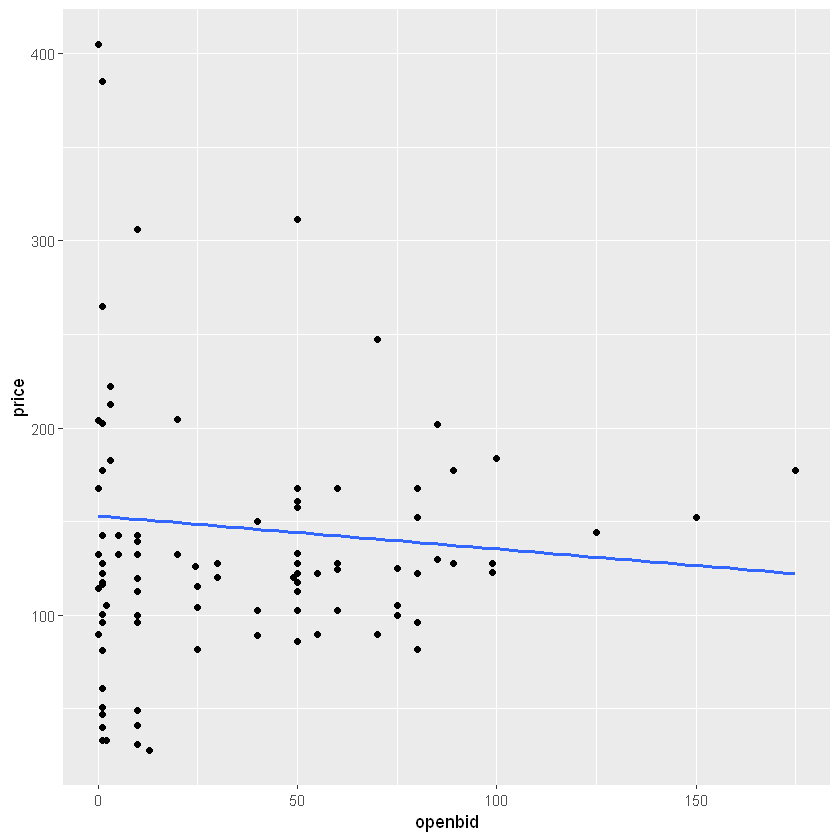

In [29]:
auctions = read.csv("Xbox_auctions.csv")

# Take a glimpse at the dataset
str(auctions)

# Model price vs. opening bid using auctions
mdl_price_vs_openbid <- lm(price ~ openbid, data = auctions)

# See the result
mdl_price_vs_openbid

# Using auctions, plot price vs. opening bid as a 
# scatter plot with linear regression trend lines
ggplot(auctions, aes(x = openbid, y  = price)) + geom_point() + 
geom_smooth(method = "lm", se = FALSE)



### Modeling each auction type
You just saw that the opening bid price appeared not to affect the final sale price of Palm Pilots in the eBay auctions. Now let's look at what happens when you model the three auction types (1, 2, 3, 5,7,..) separately.

In [30]:
# Fit linear regression of price vs. opening bid and auction 
# type, with an interaction.
mdl_price_vs_both <- lm(price ~ openbid + auction_type + openbid:auction_type , data = auctions)

# See the result
mdl_price_vs_both


Call:
lm(formula = price ~ openbid + auction_type + openbid:auction_type, 
    data = auctions)

Coefficients:
              (Intercept)                    openbid  
                 177.1444                    -1.6293  
        auction_type2 day          auction_type3 day  
                 -27.3778                     3.4335  
        auction_type4 day          auction_type5 day  
                  -4.8017                   -54.1205  
        auction_type6 day          auction_type7 day  
                 -56.1155                   -15.1903  
        auction_type8 day  openbid:auction_type2 day  
                 -31.9526                     2.2851  
openbid:auction_type3 day  openbid:auction_type4 day  
                   0.7025                     1.3311  
openbid:auction_type5 day  openbid:auction_type6 day  
                   2.0433                     1.7587  
openbid:auction_type7 day  openbid:auction_type8 day  
                   1.3571                     1.5744  


`geom_smooth()` using formula 'y ~ x'


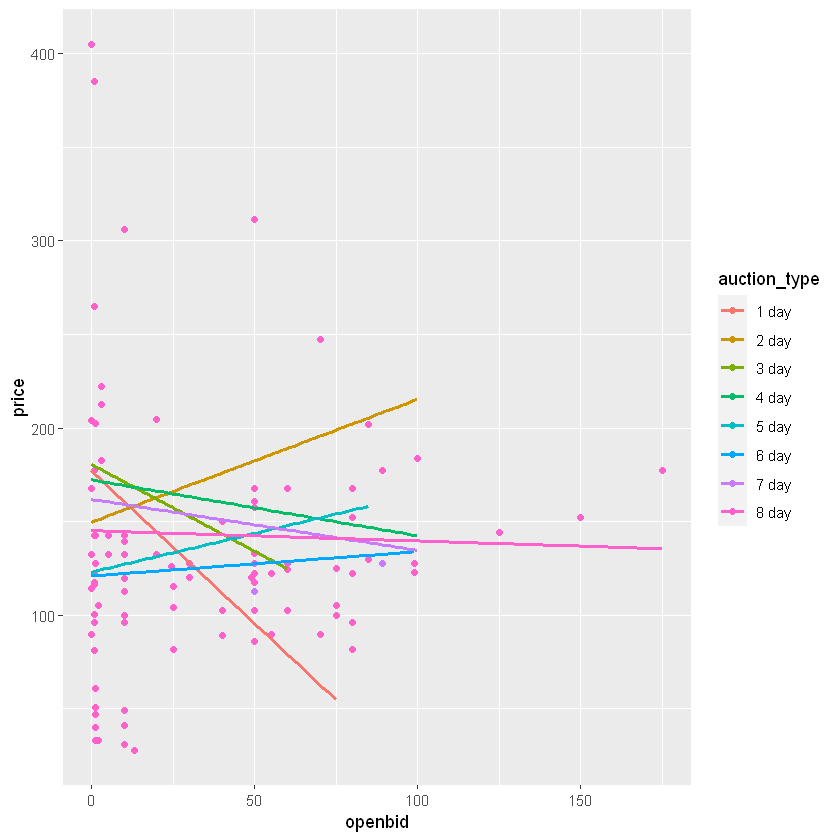

In [31]:
# Using auctions, plot price vs. opening bid colored by
# auction type as a scatter plot with linear regr'n trend lines
ggplot(auctions, aes(x = openbid, y  = price, color = auction_type)) + geom_point() + 
geom_smooth(method = "lm", se = FALSE)

### What is the Simpson's Paradox?

Interpreting models is a subtle art, and your conclusions need to be based on the question you are trying to answer. Here, the answer to 'Does opening bid affect final sale price?' is no overall, but the answer to 'Does opening bid price affect final sale price for any type of auction?' is yes, for 5 day auctions.

Simpson's paradox is a phenomenon in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. This result is often encountered in social-science and medical-science statistics and is particularly problematic when frequency data is unduly given causal interpretations.